# Analyse des données de Demandes de Valeurs Foncières (DVF)

## Importation des modules

In [5]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Préparation des données

In [15]:
url = 'https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20240408-125738/valeursfoncieres-2023.txt'
df = pd.read_csv(url, sep='|', low_memory=False).dropna(axis=1, how='all')
df

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,1,05/01/2023,Vente,"1070000,00",184.0,NaN,ALL,0124,DES HETRES,1630.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
1,1,05/01/2023,Vente,"1070000,00",159.0,NaN,ALL,0124,DES HETRES,1630.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
2,1,05/01/2023,Vente,"1070000,00",159.0,NaN,ALL,0124,DES HETRES,1630.0,...,NaN,NaN,1,2.0,Appartement,233.0,8.0,NaN,NaN,NaN
3,1,03/01/2023,Vente,"152200,00",2914.0,NaN,RTE,0107,DE PONCIN,1450.0,...,NaN,NaN,0,1.0,Maison,64.0,3.0,S,NaN,988.0
4,1,05/01/2023,Vente,"269000,00",427.0,T,CHE,0040,DE L'AUBEPIN,1800.0,...,NaN,NaN,0,1.0,Maison,73.0,3.0,S,NaN,835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,1,05/10/2023,Adjudication,"3931000,00",39.0,NaN,AV,1832,CHARLES FLOQUET,75007.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3727001,1,05/10/2023,Adjudication,"3931000,00",39.0,NaN,AV,1832,CHARLES FLOQUET,75007.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3727002,1,05/10/2023,Adjudication,"3931000,00",39.0,NaN,AV,1832,CHARLES FLOQUET,75007.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3727003,1,28/12/2023,Vente,"98250,00",66.0,B,RUE,8892,SEBASTIEN MERCIER,75015.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN


In [387]:
# On prend le département de Paris
df1 = df[df['Code departement'] == '75']

# Dates = pd.to_datetime(df1['Date mutation'], dayfirst=True)

df1_cleaned = df1.drop(['B/T/Q', 'Voie', 'Code voie', 'Commune', 'No Volume', '1er lot', '2eme lot', '3eme lot', '4eme lot',  '5eme lot', 'Nombre de lots', 'Type local', 'No disposition'], axis=1)
df1_cleaned.isnull().sum()

Date mutation                     0
Nature mutation                   0
Valeur fonciere                 563
No voie                         205
Type de voie                    241
Code postal                     202
Code departement                  0
Code commune                      0
Prefixe de section            80420
Section                           0
No plan                           0
Surface Carrez du 1er lot     51213
Surface Carrez du 2eme lot    71555
Surface Carrez du 3eme lot    79565
Surface Carrez du 4eme lot    80226
Surface Carrez du 5eme lot    80345
Code type local                 804
Surface reelle bati             811
Nombre pieces principales       811
Nature culture                73224
Nature culture speciale       80420
Surface terrain               73224
dtype: int64

In [388]:
df1_cleaned

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,...,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
3646585,03/01/2023,Vente,"1825000,00",89.0,RUE,75001.0,75,101,NaN,AP,...,NaN,NaN,NaN,NaN,4.0,165.0,0.0,NaN,NaN,NaN
3646586,05/01/2023,Vente,"567000,00",51.0,RUE,75010.0,75,110,NaN,AV,...,NaN,NaN,NaN,NaN,4.0,52.0,0.0,NaN,NaN,NaN
3646587,04/01/2023,Vente,"140000,00",178.0,RUE,75017.0,75,117,NaN,BG,...,NaN,NaN,NaN,NaN,2.0,18.0,1.0,NaN,NaN,NaN
3646588,05/01/2023,Vente,"400000,00",12.0,RUE,75009.0,75,109,NaN,BD,...,NaN,NaN,NaN,NaN,2.0,43.0,1.0,NaN,NaN,NaN
3646589,04/01/2023,Vente,"141343,12",63.0,RUE,75018.0,75,118,NaN,AK,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,05/10/2023,Adjudication,"3931000,00",39.0,AV,75007.0,75,107,NaN,BU,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN
3727001,05/10/2023,Adjudication,"3931000,00",39.0,AV,75007.0,75,107,NaN,BU,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN
3727002,05/10/2023,Adjudication,"3931000,00",39.0,AV,75007.0,75,107,NaN,BU,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN
3727003,28/12/2023,Vente,"98250,00",66.0,RUE,75015.0,75,115,NaN,FV,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN


### Numérisation des données

## Numérisation des données

In [389]:
df1_cleaned['Valeur fonciere'] = df1_cleaned['Valeur fonciere'].str.replace(',', '.').astype(float)

df1_cleaned['Type de voie'] = df1_cleaned['Type de voie'].astype("category").cat.codes
df1_cleaned['Nature mutation'] = df1_cleaned["Nature mutation"].astype("category").cat.codes
df1_cleaned['Nature culture'] = df1_cleaned["Nature culture"].astype("category").cat.codes

df1_cleaned['Nature culture speciale'] = df1_cleaned["Nature culture speciale"].fillna("0").astype("category").cat.codes
df1_cleaned['Nature culture speciale'] = df1_cleaned["Nature culture speciale"].astype("category").cat.codes

df1_cleaned['Section'] = df1_cleaned['Section'].astype("category").cat.codes
df1_cleaned['No voie'] = df1_cleaned['No voie'].astype("category").cat.codes

df1_cleaned.loc[df1_cleaned['Code departement'] == '2A', 'Code departement'] = 200
df1_cleaned.loc[df1_cleaned['Code departement'] == '2B', 'Code departement'] = 201
df1_cleaned['Code departement'] = df1_cleaned['Code departement'].astype(int)

df1_cleaned['Prefixe de section'] = df1_cleaned['Prefixe de section'].fillna(0).astype(int)

#Transformer les surfaces en float
df1_cleaned['Surface Carrez du 1er lot'] = df1_cleaned['Surface Carrez du 1er lot'].str.replace(',', '.').astype(float)
df1_cleaned['Surface Carrez du 2eme lot'] = df1_cleaned['Surface Carrez du 2eme lot'].str.replace(',', '.').astype(float)
df1_cleaned['Surface Carrez du 3eme lot'] = df1_cleaned['Surface Carrez du 3eme lot'].str.replace(',', '.').astype(float)
df1_cleaned['Surface Carrez du 4eme lot'] = df1_cleaned['Surface Carrez du 4eme lot'].str.replace(',', '.').astype(float)
df1_cleaned['Surface Carrez du 5eme lot'] = df1_cleaned['Surface Carrez du 5eme lot'].str.replace(',', '.').astype(float)

#On met les valeurs manquantes à 0 pour les surfaces
df1_cleaned['Surface reelle bati'] = df1_cleaned['Surface reelle bati'].fillna(0)
df1_cleaned['Surface terrain'] = df1_cleaned['Surface terrain'].fillna(0)
df1_cleaned['Surface Carrez du 1er lot'] = df1_cleaned['Surface Carrez du 1er lot'].fillna(0)
df1_cleaned['Surface Carrez du 2eme lot'] = df1_cleaned['Surface Carrez du 2eme lot'].fillna(0)
df1_cleaned['Surface Carrez du 3eme lot'] = df1_cleaned['Surface Carrez du 3eme lot'].fillna(0)
df1_cleaned['Surface Carrez du 4eme lot'] = df1_cleaned['Surface Carrez du 4eme lot'].fillna(0)
df1_cleaned['Surface Carrez du 5eme lot'] = df1_cleaned['Surface Carrez du 5eme lot'].fillna(0)

df1_cleaned['Surface Totale'] = df1_cleaned['Surface reelle bati'] + df1_cleaned['Surface terrain'] + df1_cleaned['Surface Carrez du 1er lot'] + df1_cleaned['Surface Carrez du 2eme lot'] + df1_cleaned['Surface Carrez du 3eme lot'] + df1_cleaned['Surface Carrez du 4eme lot'] + df1_cleaned['Surface Carrez du 5eme lot']

df1_cleaned = df1_cleaned.drop(['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot'], axis=1)


In [361]:
df1_cleaned

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Totale
3646585,03/01/2023,3,1825000.00,88,17,75001.0,75,101,0,15,50,4.0,165.0,0.0,-1,0,0.0,260.21
3646586,05/01/2023,3,567000.00,50,17,75010.0,75,110,0,21,75,4.0,52.0,0.0,-1,0,0.0,52.00
3646587,04/01/2023,3,140000.00,177,17,75017.0,75,117,0,32,53,2.0,18.0,1.0,-1,0,0.0,36.75
3646588,05/01/2023,3,400000.00,11,17,75009.0,75,109,0,29,36,2.0,43.0,1.0,-1,0,0.0,86.80
3646589,04/01/2023,3,141343.12,62,17,75018.0,75,118,0,10,14,3.0,0.0,0.0,-1,0,0.0,11.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,05/10/2023,0,3931000.00,38,1,75007.0,75,107,0,46,4,3.0,0.0,0.0,-1,0,0.0,0.00
3727001,05/10/2023,0,3931000.00,38,1,75007.0,75,107,0,46,4,3.0,0.0,0.0,-1,0,0.0,0.00
3727002,05/10/2023,0,3931000.00,38,1,75007.0,75,107,0,46,4,3.0,0.0,0.0,-1,0,0.0,0.00
3727003,28/12/2023,3,98250.00,65,17,75015.0,75,115,0,150,100,3.0,0.0,0.0,-1,0,0.0,0.00


In [362]:
df1_cleaned.isnull().sum()

Date mutation                  0
Nature mutation                0
Valeur fonciere              563
No voie                        0
Type de voie                   0
Code postal                  202
Code departement               0
Code commune                   0
Prefixe de section             0
Section                        0
No plan                        0
Code type local              804
Surface reelle bati            0
Nombre pieces principales    811
Nature culture                 0
Nature culture speciale        0
Surface terrain                0
Surface Totale                 0
dtype: int64

In [390]:
df1_cleaned = df1_cleaned.dropna(axis=0, how='any', subset=['Valeur fonciere', 'Code postal','Code type local'])
df1_cleaned.isnull().sum()

Date mutation                0
Nature mutation              0
Valeur fonciere              0
No voie                      0
Type de voie                 0
Code postal                  0
Code departement             0
Code commune                 0
Prefixe de section           0
Section                      0
No plan                      0
Code type local              0
Surface reelle bati          0
Nombre pieces principales    7
Nature culture               0
Nature culture speciale      0
Surface terrain              0
Surface Totale               0
dtype: int64

In [391]:
df1_cleaned = df1_cleaned.drop_duplicates()

In [392]:
Dates = pd.to_datetime(df1_cleaned['Date mutation'], dayfirst=True)
df1_cleaned_with_dates = df1_cleaned.copy(deep=True)
df1_cleaned = df1_cleaned.drop('Date mutation', axis=1)
df1_cleaned

,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Totale
3646585,3,1825000.00,88,17,75001.0,75,101,0,15,50,4.0,165.0,0.0,-1,0,0.0,260.21
3646586,3,567000.00,50,17,75010.0,75,110,0,21,75,4.0,52.0,0.0,-1,0,0.0,52.00
3646587,3,140000.00,177,17,75017.0,75,117,0,32,53,2.0,18.0,1.0,-1,0,0.0,36.75
3646588,3,400000.00,11,17,75009.0,75,109,0,29,36,2.0,43.0,1.0,-1,0,0.0,86.80
3646589,3,141343.12,62,17,75018.0,75,118,0,10,14,3.0,0.0,0.0,-1,0,0.0,11.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726995,0,144000.00,4,17,75015.0,75,115,0,10,1,2.0,15.0,1.0,-1,0,0.0,15.00
3726996,0,3931000.00,38,1,75007.0,75,107,0,46,4,3.0,0.0,0.0,-1,0,0.0,0.00
3726998,0,3931000.00,38,1,75007.0,75,107,0,46,4,2.0,206.0,6.0,-1,0,0.0,206.00
3727003,3,98250.00,65,17,75015.0,75,115,0,150,100,3.0,0.0,0.0,-1,0,0.0,0.00


In [217]:
Dates

3646585   2023-01-03
3646586   2023-01-05
3646587   2023-01-04
3646588   2023-01-05
3646589   2023-01-04
             ...    
3726995   2023-02-16
3726996   2023-10-05
3726998   2023-10-05
3727003   2023-12-28
3727004   2023-12-28
Name: Date mutation, Length: 66726, dtype: datetime64[ns]

In [ ]:
# TODO : trouver un groupby adapté

## Visualisation des données

### Matrice de corrélation

In [218]:
# Matrice de corrélation
correlation_matrix = df1_cleaned.corr()
correlation_matrix

,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Totale
Nature mutation,1.000000,0.143909,-0.000420,0.008794,0.003485,NaN,0.003485,NaN,0.001836,0.000552,-0.001867,0.002080,-0.003193,0.028107,NaN,0.028709,0.031607
Valeur fonciere,0.143909,1.000000,-0.008529,0.005398,-0.089952,NaN,-0.089952,NaN,-0.021970,-0.019336,0.058917,0.132140,0.007953,0.264240,NaN,0.256839,0.255649
No voie,-0.000420,-0.008529,1.000000,-0.132887,0.043509,NaN,0.043509,NaN,0.000916,-0.038392,0.010569,0.000766,-0.007065,-0.001252,NaN,0.016081,0.009979
Type de voie,0.008794,0.005398,-0.132887,1.000000,-0.029788,NaN,-0.029788,NaN,-0.062362,0.104075,-0.026215,-0.030795,-0.020638,0.016230,NaN,0.009618,-0.019897
Code postal,0.003485,-0.089952,0.043509,-0.029788,1.000000,NaN,1.000000,NaN,0.363428,0.021350,-0.047588,-0.046125,-0.018626,-0.080413,NaN,-0.030178,-0.049804
Code departement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Code commune,0.003485,-0.089952,0.043509,-0.029788,1.000000,NaN,1.000000,NaN,0.363428,0.021350,-0.047588,-0.046125,-0.018626,-0.080413,NaN,-0.030178,-0.049804
Prefixe de section,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Section,0.001836,-0.021970,0.000916,-0.062362,0.363428,NaN,0.363428,NaN,1.000000,-0.034489,-0.006266,-0.007459,-0.005443,-0.028272,NaN,0.011925,0.007447
No plan,0.000552,-0.019336,-0.038392,0.104075,0.021350,NaN,0.021350,NaN,-0.034489,1.000000,-0.026192,-0.006536,0.002375,0.037148,NaN,0.002797,-0.013230


In [219]:
correlation_matrix.isnull().sum()

Nature mutation               3
Valeur fonciere               3
No voie                       3
Type de voie                  3
Code postal                   3
Code departement             17
Code commune                  3
Prefixe de section           17
Section                       3
No plan                       3
Code type local               3
Surface reelle bati           3
Nombre pieces principales     3
Nature culture                3
Nature culture speciale      17
Surface terrain               3
Surface Totale                3
dtype: int64

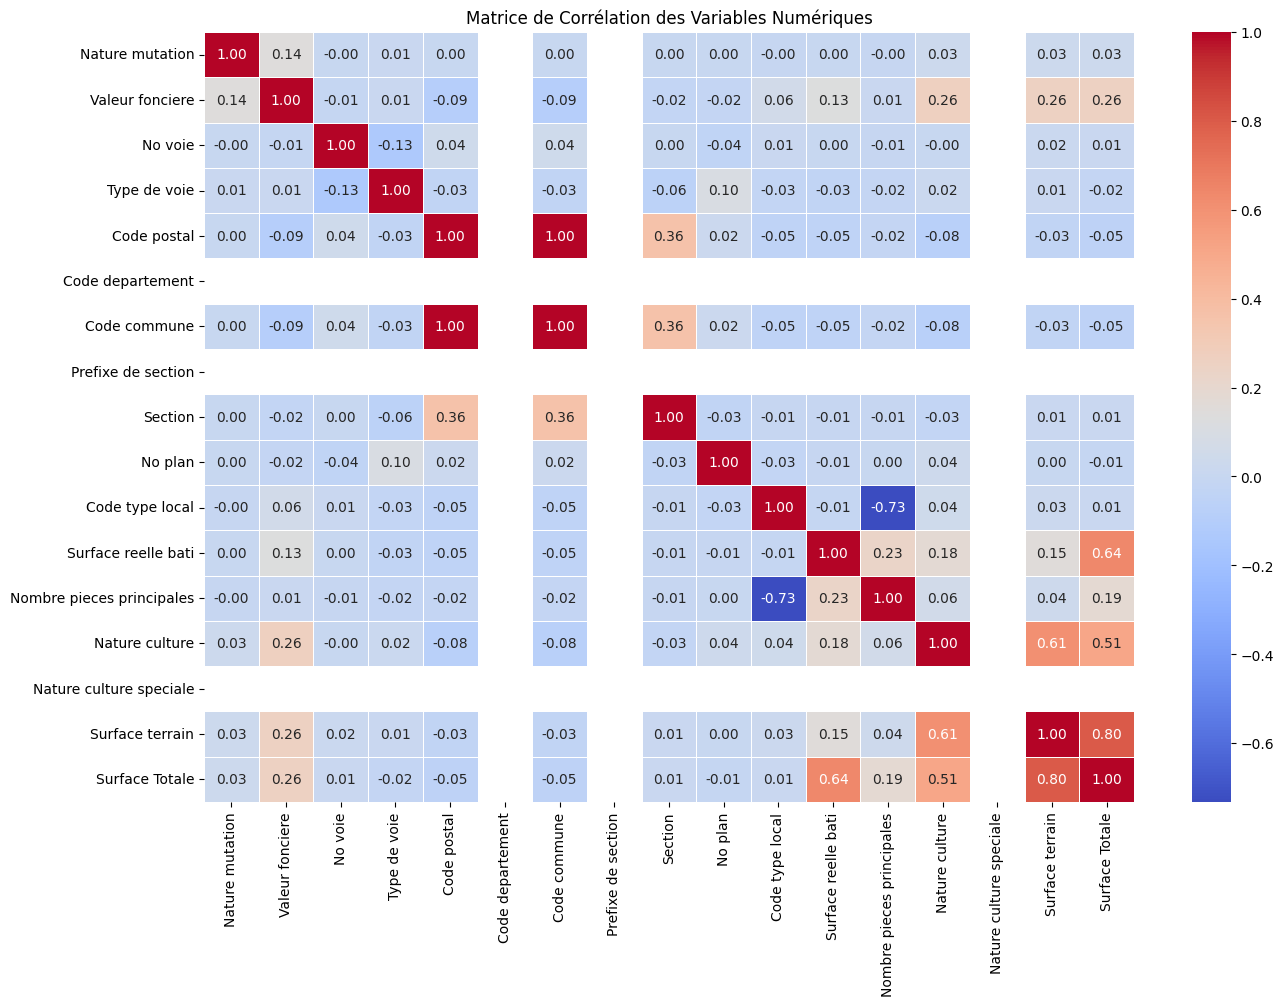

In [220]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

Répartition des variables

### Date mutation VS Valeur foncière

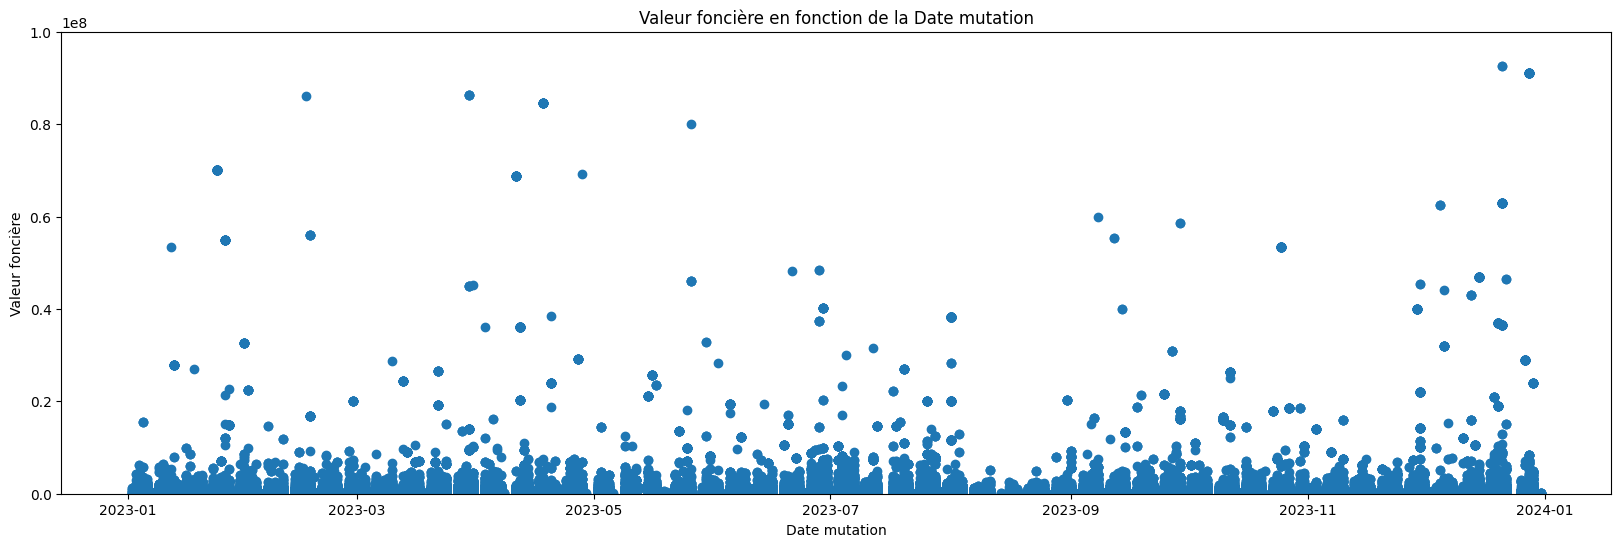

In [221]:
plt.figure(figsize=(20, 6))
plt.scatter(Dates, df1_cleaned['Valeur fonciere'])
plt.ylim(0, 100000000)
plt.xlabel('Date mutation')
plt.ylabel('Valeur foncière')
plt.title('Valeur foncière en fonction de la Date mutation')
plt.show()

On n'observe pas de corrélation entre la date de mutation et la valeur foncière.

### Valeur foncière VS Surface Totale

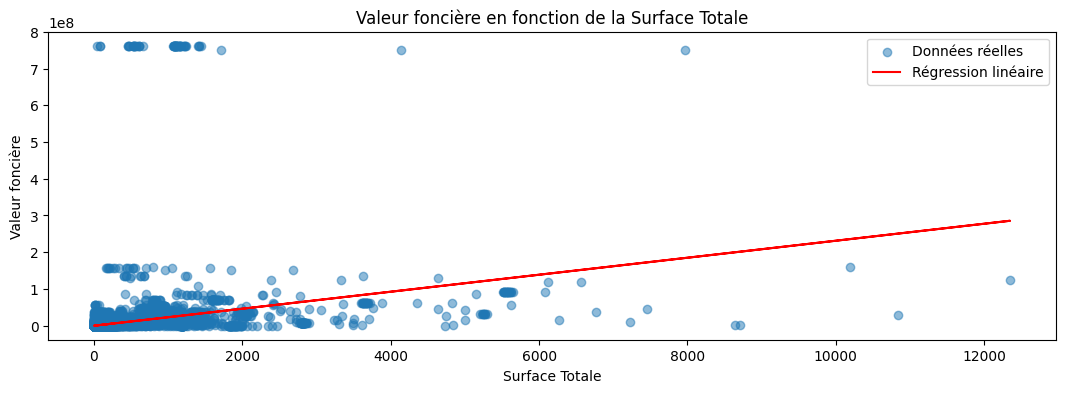

In [332]:

from sklearn.linear_model import LinearRegression

X = df1_cleaned['Surface Totale'].values.reshape(-1, 1)
y = df1_cleaned['Valeur fonciere'].values


model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Tracer le graphique de dispersion avec la régression linéaire
plt.figure(figsize=(13, 4))
plt.scatter(df1_cleaned['Surface Totale'], df1_cleaned['Valeur fonciere'], alpha=0.5, label='Données réelles')
plt.plot(df1_cleaned['Surface Totale'], y_pred, color='red', label='Régression linéaire')
plt.xlabel('Surface Totale')
plt.ylabel('Valeur foncière')
plt.title('Valeur foncière en fonction de la Surface Totale')
plt.legend()
plt.show()



On peut voir que nos données suivent partiellement une regression linéaire pour ces deux variables.

On essaye de faire la même chose mais avec le prix au mètre carré.

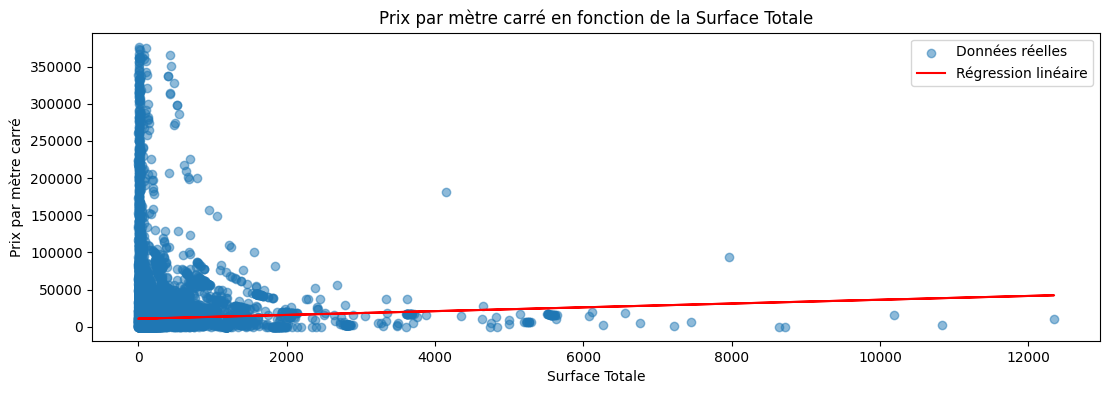

In [353]:
from scipy import stats

# Supprimer les valeurs aberrantes et calculer le prix par mètre carré
df1_cleaned['Prix m2'] = df1_cleaned['Valeur fonciere'] / df1_cleaned['Surface Totale'].replace(0, np.nan)

# Supprimer les lignes avec des valeurs NaN
df1_cleaned.dropna(subset=['Prix m2'], inplace=True)

# Supprimer les valeurs aberrantes
z_scores = stats.zscore(df1_cleaned['Prix m2'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df_cleaned = df1_cleaned[filtered_entries]

# Préparation des données
X = df_cleaned['Surface Totale'].values.reshape(-1, 1)
y = df_cleaned['Prix m2'].values

# Entraînement du modèle
model = LinearRegression()
model.fit(X, y)

# Prédiction
y_pred = model.predict(X)

# Tracé du graphique
plt.figure(figsize=(13, 4))
plt.scatter(df_cleaned['Surface Totale'], df_cleaned['Prix m2'], alpha=0.5, label='Données réelles')
plt.plot(df_cleaned['Surface Totale'], y_pred, color='red', label='Régression linéaire')
plt.xlabel('Surface Totale')
plt.ylabel('Prix par mètre carré')
plt.title('Prix par mètre carré en fonction de la Surface Totale')
plt.legend()
plt.show()



Cela suis également en partie une régression linéaire.

Il y'a donc une corrélation entre le prix au m2 et la surface totale ce qui est logique.

### Code département VS Valeur foncière

In [393]:
df1_cleaned['Code postal']

3646585    75001.0
3646586    75010.0
3646587    75017.0
3646588    75009.0
3646589    75018.0
            ...   
3726995    75015.0
3726996    75007.0
3726998    75007.0
3727003    75015.0
3727004    75015.0
Name: Code postal, Length: 66726, dtype: float64

On utilise la moyenne de la valeur foncière pour chaque code département. Cela permet d'annuler l'effet des valeurs extrêmes.

In [257]:
means_valeur_fonciere = df1_cleaned.groupby('Code postal')['Valeur fonciere'].mean()

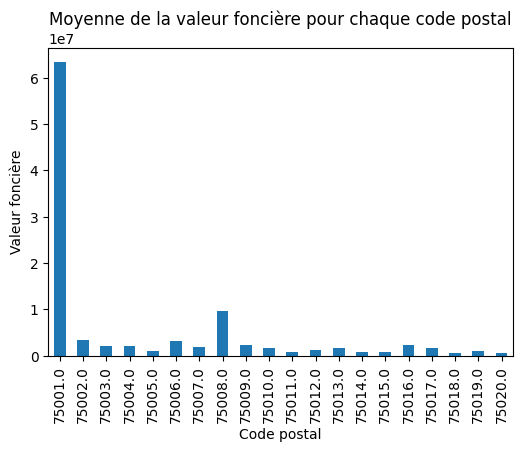

In [258]:
# Moyenen de la valeur foncière pour chaque arrondissement de Paris
plt.figure(figsize=(6, 4))
means_valeur_fonciere.plot(kind='bar')
plt.xlabel('Code postal')
plt.ylabel('Valeur foncière')
plt.title('Moyenne de la valeur foncière pour chaque code postal')
plt.show()

On observe des une valeur foncière moyenne annormalement élevé pour le 1er arrondissement de Paris. Cela est dû à des valeurs extrêmes. On va donc supprimer ces valeurs extrêmes pour mieux visualiser.

In [335]:
import numpy as np

mean_price = df1_cleaned['Valeur fonciere'].mean()
std_dev_price = df1_cleaned['Valeur fonciere'].std()
df1_cleaned['z_score'] = (df1_cleaned['Valeur fonciere'] - mean_price) / std_dev_price
threshold = 3

# Filtrer les observations aberrantes
filtered_data = df1_cleaned[df1_cleaned['z_score'].abs() <= threshold]

# Supprimer la colonne z-score ajoutée
filtered_data.drop('z_score', axis=1, inplace=True)

/var/folders/q1/36mf0_gn0zv465ntj6w0chtc0000gn/T/ipykernel_20377/3671203796.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop('z_score', axis=1, inplace=True)


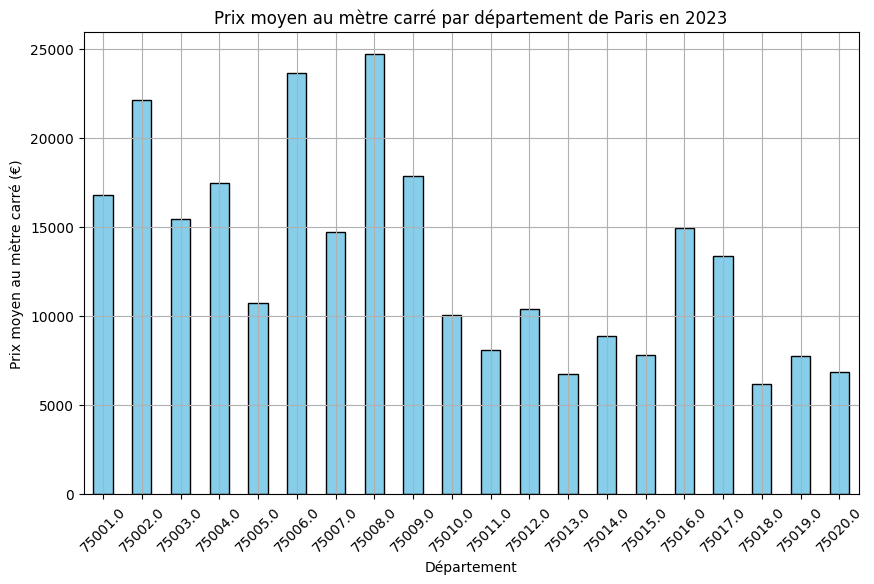

In [336]:
# Calculer le prix moyen au mètre carré pour chaque département
prix_moyen_par_departement = filtered_data.groupby('Code postal')['Valeur fonciere'].mean() / filtered_data.groupby('Code postal')['Surface Totale'].mean()

# Créer un diagramme en barres pour visualiser les prix moyens au mètre carré par département
plt.figure(figsize=(10, 6))
prix_moyen_par_departement.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Prix moyen au mètre carré par département de Paris en 2023')
plt.xlabel('Département')
plt.ylabel('Prix moyen au mètre carré (€)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Nous pouvons donc voir ici qu'en supprimant les valeurs extrèmes nous avons des résultats beaucoup plus cohérents.


On peut donc voir que le prix varie d'un arrondissement à un autre. L'arrondissement a donc un impact sur le prix moyen au mètre carré dans Paris.

### Nature Culture VS Surface Totale

In [394]:
df1_cleaned['Nature culture'].value_counts()

Nature culture
-1    64203
 3     2522
 1        1
Name: count, dtype: int64

In [395]:
df1_cleaned['Nature culture'].value_counts()

Nature culture
-1    64203
 3     2522
 1        1
Name: count, dtype: int64

On peut voir que nous possédons 2523 valeurs non nulles dans Nature culture et que ces valeurs sont pour la plupart 3 qui signifie S pour sols et 1 qui signifie AG pour terrains d’agrément

         Nature culture  Surface Totale
3646723               3            46.0
3646805               3           604.0
3646806               3           657.0
3646807               3           470.0
3646808               3           538.0


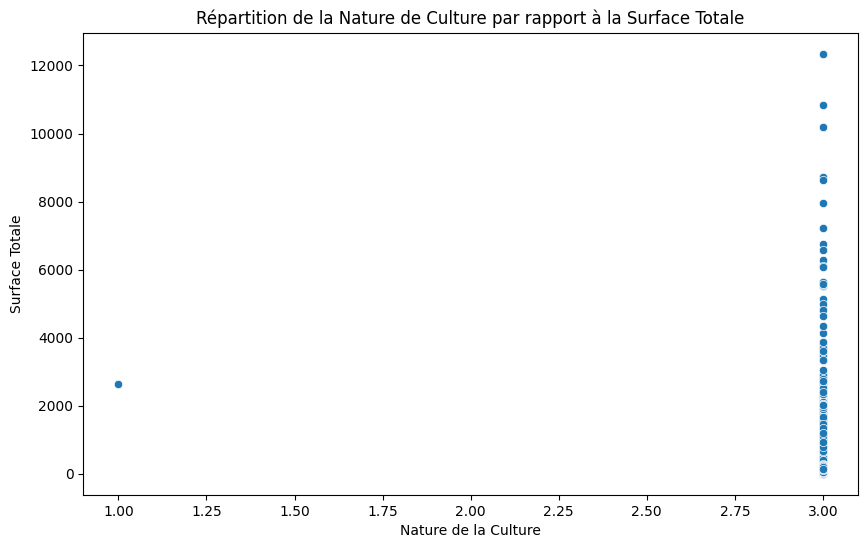

In [396]:
df_filtered = df1_cleaned[df1_cleaned['Nature culture'] != -1]

# Vérification des données
print(df_filtered[['Nature culture', 'Surface Totale']].head())

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nature culture', y='Surface Totale', data=df_filtered)
plt.ylabel('Surface Totale')
plt.xlabel('Nature de la Culture')
plt.title('Répartition de la Nature de Culture par rapport à la Surface Totale')
plt.show()

La répartition de la nature culture n'a pas vraiment d'impact sur la surface totale des biens immobiliers à Paris.

### Répartition des types de biens à Paris

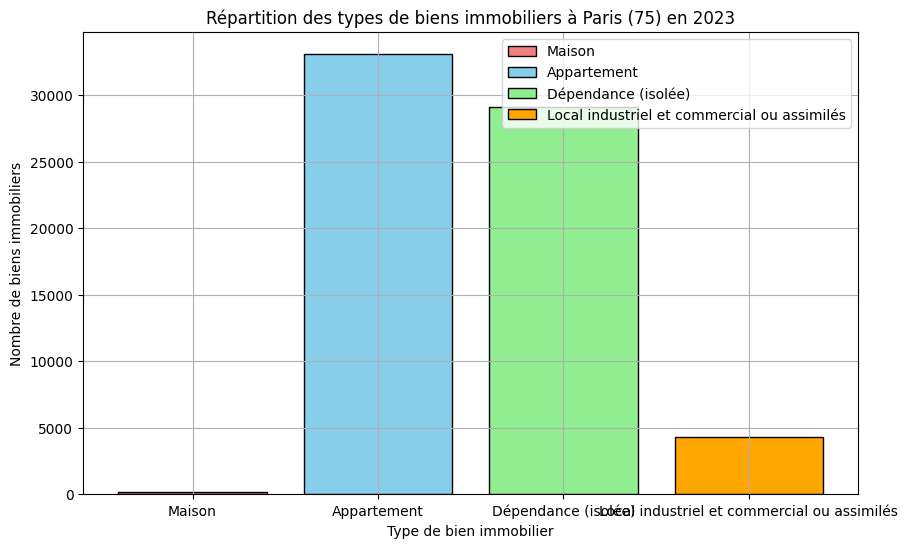

In [409]:

labels = {1: 'Maison', 2: 'Appartement', 3: 'Dépendance (isolée)', 4: 'Local industriel et commercial ou assimilés'}
colors = ['lightcoral', 'skyblue', 'lightgreen', 'orange']

# Grouper les données par type de bien immobilier et compter le nombre de chaque type
grouped_data = df1_cleaned.groupby('Code type local').size().reset_index(name='counts')
grouped_data

# Créer un diagramme en barres empilées
fig, ax = plt.subplots(figsize=(10, 6))

for code, color in zip(sorted(labels.keys()), colors):
    count = grouped_data[grouped_data['Code type local'] == code]['counts'].values
    label = labels[code]
    ax.bar(label, count, color=color, edgecolor='black', label=label)

plt.legend(loc='upper right')
plt.title('Répartition des types de biens immobiliers à Paris (75) en 2023')
plt.xlabel('Type de bien immobilier')
plt.ylabel('Nombre de biens immobiliers')
plt.grid(True)
plt.show()


In [403]:
# Filtrer pour l'année 2023 et pour le type de bien 'Maison'
maisons_2023 = df1_cleaned[(df1_cleaned_with_dates['Code type local'] == 1)]

# Compter le nombre de maisons vendues
nombre_maisons_2023 = maisons_2023.shape[0]
print(f"Nombre de maisons vendues en 2023 : {nombre_maisons_2023}")


Nombre de maisons vendues en 2023 : 177


On peut voir ici que ,dans Paris, la plupart des ventes, en 2023, sont des appartements et des dépendances. Nous avons seulement 177 ventes de maisons en 2023 ce qui explique pourquoi on ne peux pas l'apercevoir.

/var/folders/q1/36mf0_gn0zv465ntj6w0chtc0000gn/T/ipykernel_20377/77240752.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_filtered['Type de bien'] = df_2023_filtered['Code type local'].map(labels)


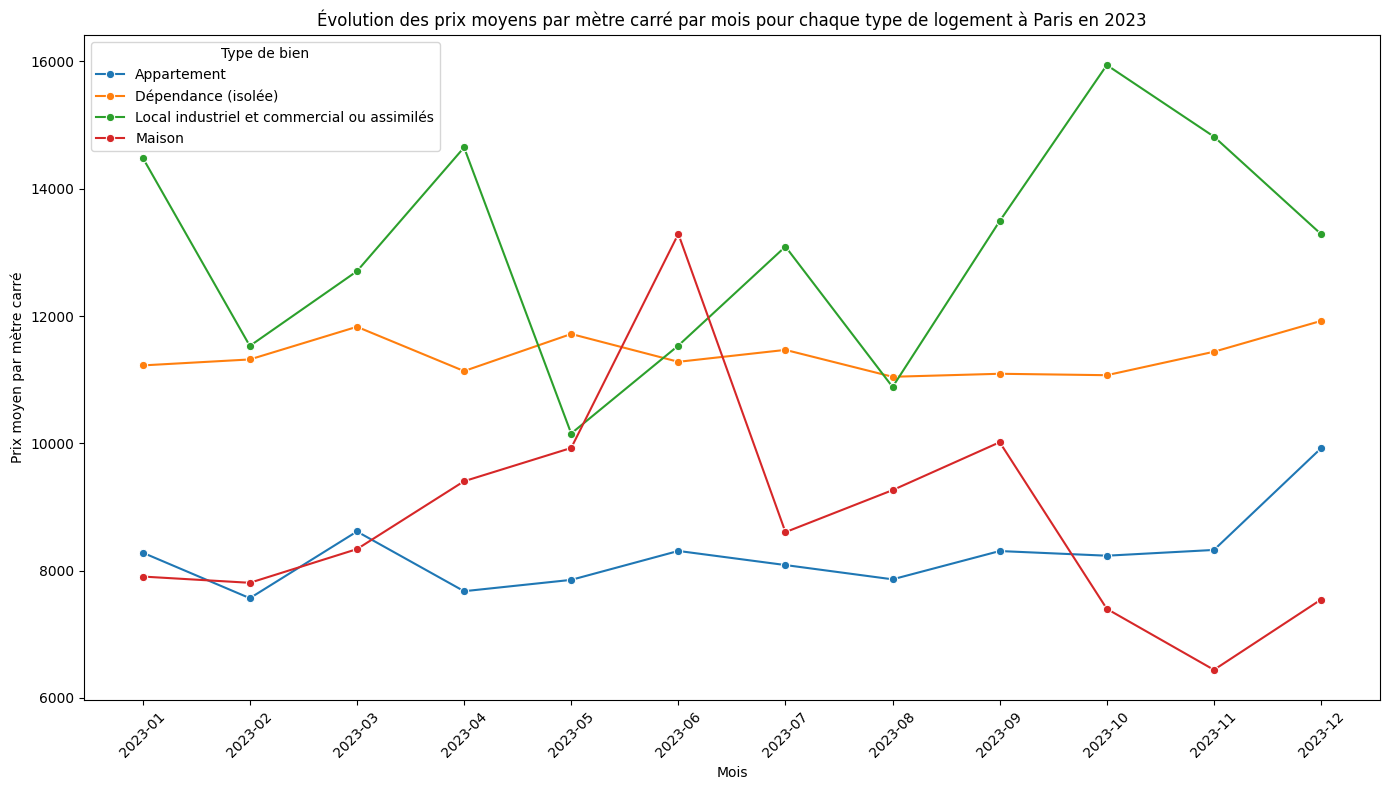

In [398]:
df1_cleaned_with_dates['Date mutation'] = pd.to_datetime(df1_cleaned_with_dates['Date mutation'], dayfirst=True)

df1_cleaned_with_dates['Année'] = df1_cleaned_with_dates['Date mutation'].dt.year
df1_cleaned_with_dates['Mois'] = df1_cleaned_with_dates['Date mutation'].dt.strftime('%Y-%m')

df_2023 = df1_cleaned_with_dates[df1_cleaned_with_dates['Année'] == 2023]

df_2023['Prix m2'] = df_2023['Valeur fonciere'] / df_2023['Surface Totale']

#on essaye ici d'éliminer les valeurs abberrantes
Q1 = df_2023['Prix m2'].quantile(0.25)
Q3 = df_2023['Prix m2'].quantile(0.75)
IQR = Q3 - Q1

df_2023_filtered = df_2023[(df_2023['Prix m2'] >= Q1 - 1.5 * IQR) & (df_2023['Prix m2'] <= Q3 + 1.5 * IQR)]

# Ajouter les labels pour les types locaux
labels = {1: 'Maison', 2: 'Appartement', 3: 'Dépendance (isolée)', 4: 'Local industriel et commercial ou assimilés'}
df_2023_filtered['Type de bien'] = df_2023_filtered['Code type local'].map(labels)

# Calculer le prix moyen par mètre carré pour chaque type de bien et chaque mois sans les valeurs aberrantes
df_mean_prices = df_2023_filtered.groupby(['Mois', 'Type de bien'])['Prix m2'].mean().reset_index()

# Tracer le graphique
plt.figure(figsize=(14, 8))
sns.lineplot(x='Mois', y='Prix m2', hue='Type de bien', data=df_mean_prices, marker='o')
plt.xticks(rotation=45)
plt.xlabel('Mois')
plt.ylabel('Prix moyen par mètre carré')
plt.title('Évolution des prix moyens par mètre carré par mois pour chaque type de logement à Paris en 2023')
plt.legend(title='Type de bien')
plt.tight_layout()
plt.show()

On peut donc voir ici que les appartements et les dépendances n'ont pas vraiment eu une augmentation ou une diminution de leurs prix/m2. Tandis que, pour les locaux industriels ou commerciaux, on peut voir qu'entre août et octobre nous avons un pic d'augmentation ce qui peut correspondre à un achat de locaux pour la rentrée ou le lancement de certaines entreprises. Pour les maisons on peut également voir un pic au niveau de juin 2023.

## [Géomap](https://towardsdatascience.com/how-safe-are-the-streets-of-santiago-e01ba483ce4b) des valeurs foncières

### Import des modules

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geoplot as gplt

In [ ]:
means_valeur_fonciere_without_extrem # on garde la moyenne par département réalisé précédemment

Code postal
75001.0    2.263346e+06
75002.0    3.021876e+06
75003.0    1.728915e+06
75004.0    1.878818e+06
75005.0    9.129835e+05
75006.0    2.708804e+06
75007.0    1.840984e+06
75008.0    6.555538e+06
75009.0    1.936365e+06
75010.0    1.335397e+06
75011.0    6.647858e+05
75012.0    1.077447e+06
75013.0    1.580196e+06
75014.0    7.450194e+05
75015.0    7.153282e+05
75016.0    1.940614e+06
75017.0    1.365023e+06
75018.0    5.727401e+05
75019.0    7.619682e+05
75020.0    5.052468e+05
Name: Valeur fonciere, dtype: float64

1. On convertit en DataFrame tout en gardant uniquement le numéro de l'arrondissement pour faciliter le merge des prochain dataframe

In [ ]:
# Suppression des valeurs extrêmes
df1_cleaned_without_extrem = df1_cleaned[df1_cleaned['Valeur fonciere'] < 700000000]
means_valeur_fonciere_without_extrem = df1_cleaned_without_extrem.groupby('Code postal')['Valeur fonciere'].mean()
means_valeur_fonciere_without_extrem

Code postal
75001.0    2.263346e+06
75002.0    3.021876e+06
75003.0    1.728915e+06
75004.0    1.878818e+06
75005.0    9.129835e+05
75006.0    2.708804e+06
75007.0    1.840984e+06
75008.0    6.555538e+06
75009.0    1.936365e+06
75010.0    1.335397e+06
75011.0    6.647858e+05
75012.0    1.077447e+06
75013.0    1.580196e+06
75014.0    7.450194e+05
75015.0    7.153282e+05
75016.0    1.940614e+06
75017.0    1.365023e+06
75018.0    5.727401e+05
75019.0    7.619682e+05
75020.0    5.052468e+05
Name: Valeur fonciere, dtype: float64

In [ ]:
means_valeur_fonciere_without_extrem_df = pd.DataFrame(list(means_valeur_fonciere_without_extrem.items()), columns=['Code postal', 'Valeur fonciere'])
means_valeur_fonciere_without_extrem_df['Code postal'] = means_valeur_fonciere_without_extrem_df['Code postal'].astype(int)
means_valeur_fonciere_without_extrem_df['Code postal'] = means_valeur_fonciere_without_extrem_df['Code postal'].astype(str).str[-2:].astype(int).astype(object)
means_valeur_fonciere_without_extrem_df = means_valeur_fonciere_without_extrem_df.rename(columns={"Valeur fonciere" : 'valeur_fonciere'})
means_valeur_fonciere_without_extrem_df


,Code postal,valeur_fonciere
0,1,2.263346e+06
1,2,3.021876e+06
2,3,1.728915e+06
3,4,1.878818e+06
4,5,9.129835e+05
5,6,2.708804e+06
6,7,1.840984e+06
7,8,6.555538e+06
8,9,1.936365e+06
9,10,1.335397e+06


2. Les données géographiques vont être récupérées avec un fichier geojson et ensuite stockées dans un DataFrame

In [ ]:
# On récupère  les données géographiques des arrondissements de Paris
#path = './map_Paris/arrondissements.shp'

#paris = gpd.read_file(path, encoding='utf-8')
#paris_shape = paris.to_crs('EPSG:4326')

file_path = 'arrondissements.geojson'
paris_shape = gpd.read_file(file_path)

3. Verification de la bonne importation du fichier

In [ ]:
paris_shape.head(1)

NameError: name 'paris_shape' is not defined

4. Numérisation de l'arrondissement 

In [ ]:
paris_shape['c_ar'] = paris_shape['c_ar'].astype(int)
paris_shape = paris_shape.sort_values(by='c_ar')

5. On merge le dataframe paris_shape avec means_valeur_fonciere_without_extrem_df

In [ ]:
paris_shape = paris_shape.merge(means_valeur_fonciere_without_extrem_df, left_on='c_ar', right_on='Code postal', how='left')


NameError: name 'paris_shape' is not defined

6. On drop ensuite la feature code postal car elle est identique à c_ar

In [ ]:
paris_shape = paris_shape.drop(columns=['Code postal'])

7. Pour avoir une bonne échelle, on divise par 1 million puis on convertit en float pour rentre les données exploitables

In [ ]:
paris_shape['valeur_fonciere'] = paris_shape['valeur_fonciere']/ 1000000

In [ ]:
paris_shape['valeur_fonciere'] = paris_shape['valeur_fonciere'].apply(lambda x: '{:.2f}'.format(x))
paris_shape['valeur_fonciere'] = paris_shape['valeur_fonciere'].astype(float)

8. On trie les variables dans l'ordre croissant des arrondissements

In [ ]:
paris_shape = paris_shape.sort_values(by='c_ar')



NameError: name 'paris_shape' is not defined

9. On affiche chaque arrondissement de paris selon sa valeur foncière moyenne

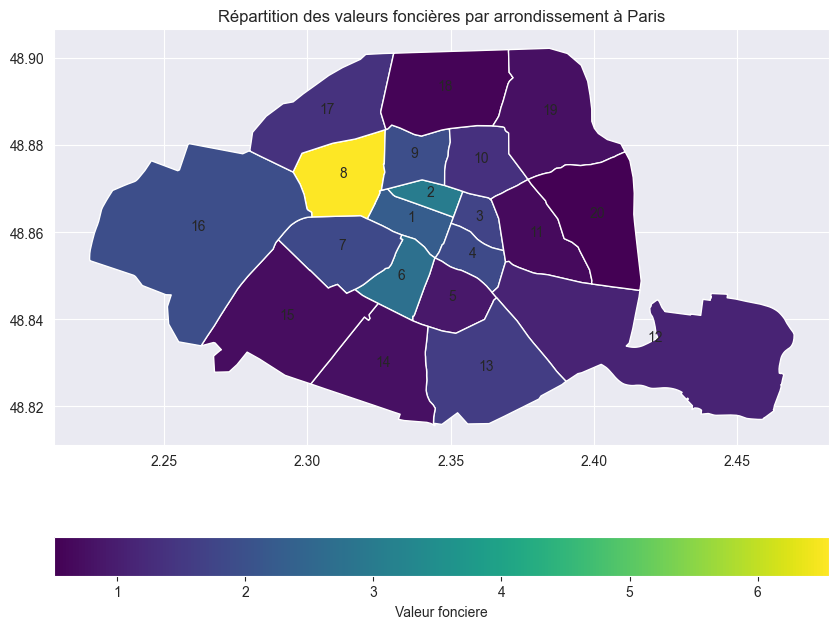

In [ ]:
fig, ax= plt.subplots(figsize=(10, 8))
paris_shape.plot(column='valeur_fonciere', cmap='viridis',legend=True, ax=ax, legend_kwds={'label': 'Valeur fonciere', "orientation": 'horizontal'})

for idx, row in paris_shape.iterrows():
    plt.annotate(text=row['c_ar'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), ha='center')

plt.title('Répartition des valeurs foncières par arrondissement à Paris')
plt.show()

# Apprentissage non supervisé - KMeans avec PCA

1. Import des modules

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

2. Récupération de la variable cible et des variables caractéristiques

In [156]:
df1_cleaned_with_dates['Date mutation'] = Dates
# drop des ligne avec des valeurs foncières extrêmes et prendre que type local appartement (2)
df1_cleaned_with_dates = df1_cleaned_with_dates[df1_cleaned_with_dates['Code type local'] == 2]
df1_cleaned_with_dates = df1_cleaned_with_dates[df1_cleaned_with_dates['Valeur fonciere'] < 700000000]
df1_cleaned_with_dates['Date mutation'] = df1_cleaned_with_dates['Date mutation'].apply(lambda x: x.toordinal())
df1_cleaned_with_dates

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Totale
3646587,738524,3,140000.0,177,17,75017.0,75,117,0,32,53,2.0,18.0,1.0,-1,0,0.0,36.75
3646588,738525,3,400000.0,11,17,75009.0,75,109,0,29,36,2.0,43.0,1.0,-1,0,0.0,86.80
3646590,738523,3,295000.0,17,17,75017.0,75,117,0,84,40,2.0,28.0,2.0,-1,0,0.0,28.00
3646592,738523,3,300400.0,74,2,75018.0,75,118,0,47,98,2.0,36.0,2.0,-1,0,0.0,72.11
3646597,738524,3,213000.0,7,17,75018.0,75,118,0,74,57,2.0,27.0,1.0,-1,0,0.0,27.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726993,738581,0,145000.0,78,17,75016.0,75,116,0,140,122,2.0,18.0,2.0,-1,0,0.0,18.00
3726994,738567,0,212000.0,4,17,75015.0,75,115,0,10,1,2.0,26.0,1.0,-1,0,0.0,26.00
3726995,738567,0,144000.0,4,17,75015.0,75,115,0,10,1,2.0,15.0,1.0,-1,0,0.0,15.00
3726998,738798,0,3931000.0,38,1,75007.0,75,107,0,46,4,2.0,206.0,6.0,-1,0,0.0,206.00


In [ ]:
df1_cleaned_with_dates.isnull().sum()

Date mutation                0
Nature mutation              0
Valeur fonciere              0
No voie                      0
Type de voie                 0
Code postal                  0
Code departement             0
Code commune                 0
Prefixe de section           0
Section                      0
No plan                      0
Code type local              0
Surface reelle bati          0
Nombre pieces principales    0
Nature culture               0
Nature culture speciale      0
Surface terrain              0
Surface Totale               0
dtype: int64

In [157]:
df1_cleaned_Xy = df1_cleaned_with_dates[['Surface Totale', 'Code postal', 'Date mutation', 'Valeur fonciere']]

# Drop des ligne avec une surface totale à 0
df1_cleaned_Xy = df1_cleaned_Xy.drop(df1_cleaned_Xy[df1_cleaned_Xy['Surface Totale'] == 0].index)

df1_cleaned_Xy['Prix/m2'] = df1_cleaned_Xy['Valeur fonciere'] / df1_cleaned_Xy['Surface Totale']
df1_cleaned_Xy = df1_cleaned_Xy.drop('Valeur fonciere', axis=1)

df1_cleaned_Xy

,Surface Totale,Code postal,Date mutation,Prix/m2
3646587,36.75,75017.0,738524,3809.523810
3646588,86.80,75009.0,738525,4608.294931
3646590,28.00,75017.0,738523,10535.714286
3646592,72.11,75018.0,738523,4165.857717
3646597,27.00,75018.0,738524,7888.888889
...,...,...,...,...
3726993,18.00,75016.0,738581,8055.555556
3726994,26.00,75015.0,738567,8153.846154
3726995,15.00,75015.0,738567,9600.000000
3726998,206.00,75007.0,738798,19082.524272


3. Standardisation des données

In [ ]:
scaler = StandardScaler()
scaler.fit(df1_cleaned_Xy)
df1_cleaned_scaled = scaler.transform(df1_cleaned_Xy)
df1_cleaned_scaled

array([[-0.41319918,  1.03530494, -1.67729496, -0.07489959],
       [-0.2174082 ,  1.03530494, -1.68707169, -0.15318901],
       [ 0.17639236,  1.48476063, -1.67729496, -0.17865222],
       ...,
       [ 0.07489165, -0.53778998,  1.83255323, -0.12881618],
       [ 0.01189941, -0.53778998,  1.83255323, -0.11235624],
       [-0.30480498,  0.58584925,  1.24594907, -0.08098657]])

In [ ]:
df1_cleaned_scaled = pd.DataFrame(df1_cleaned_scaled, columns=df1_cleaned_Xy.columns)
df1_cleaned_scaled

,Surface Totale,Code postal,Date mutation,Prix/m2
0,-0.413199,1.035305,-1.677295,-0.074900
1,-0.217408,1.035305,-1.687072,-0.153189
2,0.176392,1.484761,-1.677295,-0.178652
3,-0.226124,1.035305,-1.677295,-0.095331
4,-0.260592,-1.211974,-1.657741,-0.117612
...,...,...,...,...
13939,-0.186586,0.585849,1.822776,-0.120929
13940,-0.285630,-1.661429,1.734786,-0.110462
13941,0.074892,-0.537790,1.832553,-0.128816
13942,0.011899,-0.537790,1.832553,-0.112356


4. KMeans

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib.collections import LineCollection

#### Elbow Method

In [ ]:
wcss = []
for i in range(1, 21): # on teste 20 solutions de clustering
    model = KMeans(n_clusters=i, init='k-means++')
    model.fit(df1_cleaned_scaled)
    wcss.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Method')

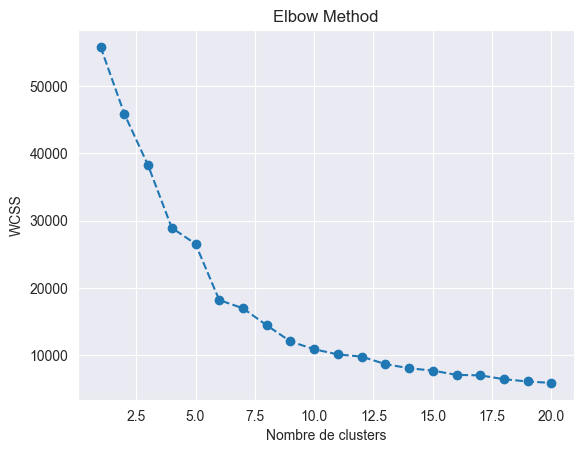

In [ ]:
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

On observe que le coude est à 5 clusters. On va donc choisir 5 clusters pour notre modèle.

#### Entrainement du modèle

In [ ]:
model = KMeans(5, init='k-means++')
model.fit(df1_cleaned_scaled)

KMeans(n_clusters=5)

In [ ]:
clusters = model.predict(df1_cleaned_scaled)
df1_cleaned_Xy['cluster'] = clusters
df1_cleaned_Xy

,Surface Totale,Code postal,Date mutation,Prix/m2,cluster
3646589,11.40,75018.0,738524,12398.519298,0
3646591,36.11,75018.0,738523,8319.025201,0
3646602,85.81,75020.0,738524,6992.192052,0
3646609,35.01,75018.0,738524,11333.904599,0
3646611,30.66,75008.0,738526,10172.863666,0
...,...,...,...,...,...
3726974,40.00,75016.0,738882,10000.000000,1
3726980,27.50,75006.0,738873,10545.454545,1
3726982,73.00,75011.0,738883,9589.041096,1
3726986,65.05,75011.0,738883,10446.733282,1


5. Visualisation des clusters

#### Scree plot

In [ ]:
pca = PCA(n_components=0.95) # 95% de la variance expliquée
pca_components = pca.fit_transform(df1_cleaned_scaled)

In [ ]:
pca = PCA(n_components=4)
pca.fit(df1_cleaned_scaled)
df_pca = pca.transform(df1_cleaned_scaled)
df_pca

array([[ 1.56894084, -0.78768629, -0.83556814,  0.5303952 ],
       [ 1.56847862, -0.59797238, -0.91151662,  0.58330244],
       [ 1.7939846 , -0.28047795, -0.84690225,  1.03274941],
       ...,
       [-1.103311  ,  0.70224727,  1.28610397, -0.55241466],
       [-1.0971489 ,  0.64526348,  1.30770879, -0.57448409],
       [-0.01368907,  0.21167628,  1.39643445,  0.00706555]])

In [ ]:
explained_variance = pca.explained_variance_ratio_

Text(0, 0.5, 'Variance Expliquée cumulées')

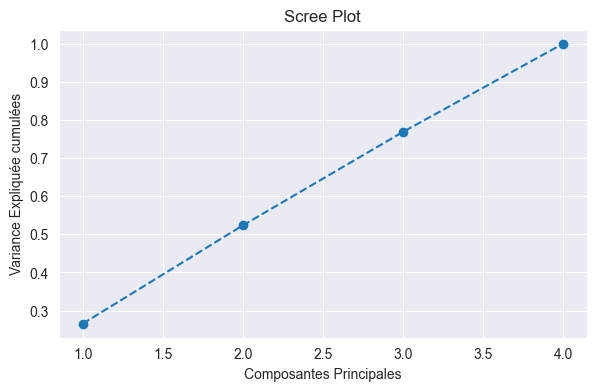

In [ ]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Composantes Principales')
plt.ylabel('Variance Expliquée cumulées')

In [ ]:
pca = PCA(n_components=3).fit(df1_cleaned_scaled)
projected = pca.transform(df1_cleaned_scaled)

La fonction suivante permet d'afficher les cercles des corrélations des variables avec les axes du plan factoriel. [GitHub](https://github.com/formasys/clustering/blob/main/crime_usa.ipynb)

In [ ]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if xmin <= x <= xmax and ymin <= y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')
			
            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
		
            plt.show(block=False)
		

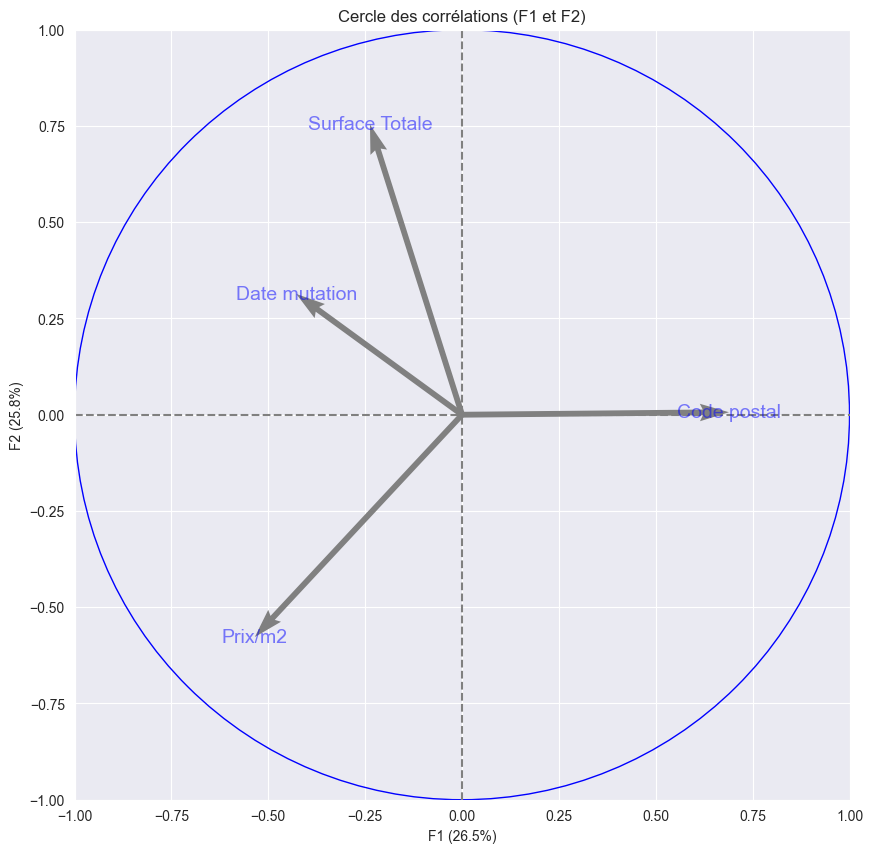

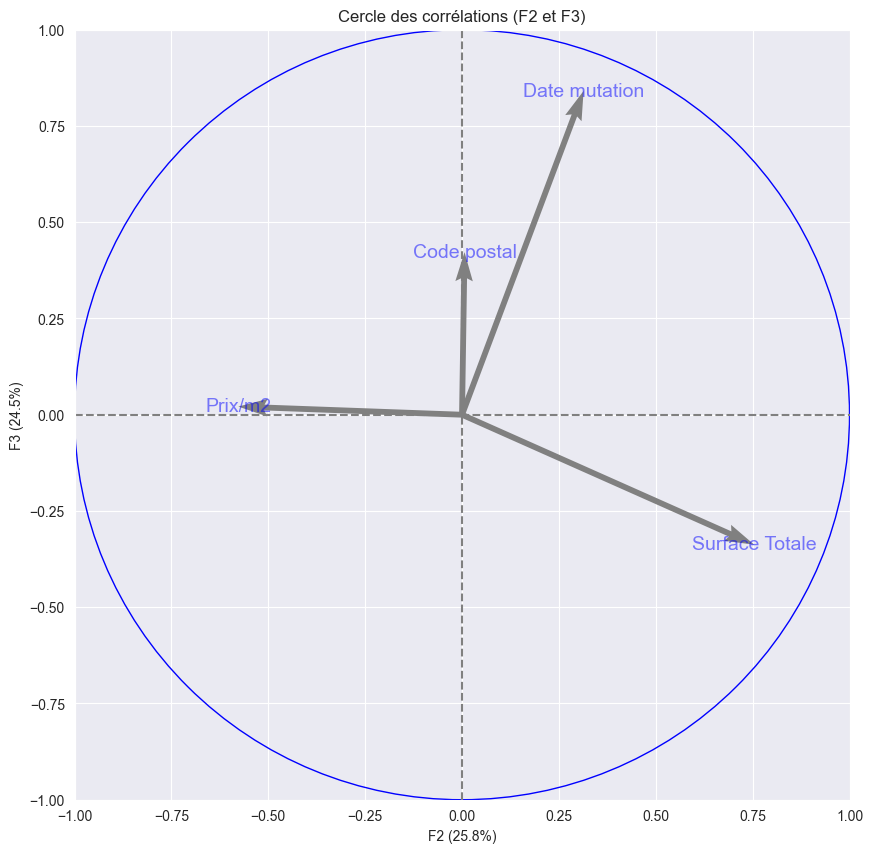

In [ ]:
display_circles(pca.components_, 3, pca, [(0,1), (1,2), (2,3)], labels=np.array(df1_cleaned_scaled.columns))

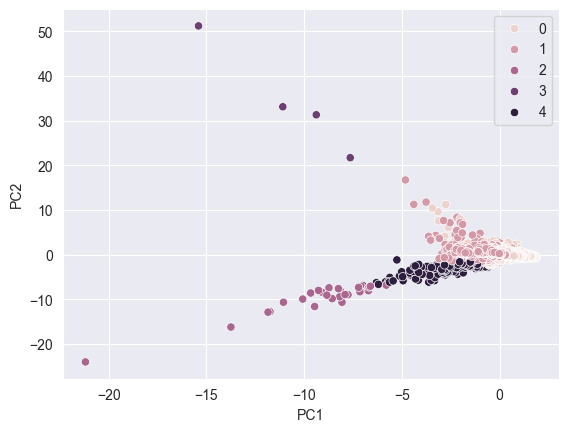

In [ ]:
sns.scatterplot(x=projected[:, 0], y=projected[:, 1], hue=clusters)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

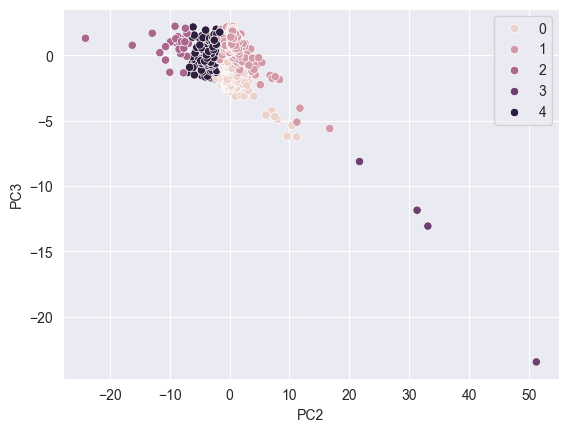

In [ ]:
sns.scatterplot(x=projected[:, 1], y=projected[:, 2], hue=clusters)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

## Apprentissage supervisé

On utilsera la surface totale, la surface réelle bati, l'arrondissement et le nombres de pieces principales pour prédire la valeur foncière d'un appartement.

In [422]:
# Filtrer pour les appartements dans le département de Paris (75)
paris_apartments = df1_cleaned_with_dates[(df1_cleaned_with_dates['Code departement'] == 75) & (df1_cleaned_with_dates['Code type local'] == 2)]

# Supprimer les colonnes inutiles pour la prédiction
columns_to_drop = ['Date mutation', 'Nature mutation', 'No voie', 'Type de voie', 'Code postal', 'Code commune', 
                   'Prefixe de section', 'Section', 'No plan', 'Code type local', 'Nature culture', 
                   'Nature culture speciale', 'Année', 'Mois']
paris_apartments = paris_apartments.drop(columns=columns_to_drop, errors='ignore')

# Supprimer les lignes avec des valeurs manquantes dans les colonnes essentielles
paris_apartments = paris_apartments.dropna(subset=['Valeur fonciere', 'Surface Totale', 'Surface reelle bati', 'Nombre pieces principales'])

paris_apartments.head()


,Valeur fonciere,Code departement,Surface reelle bati,Nombre pieces principales,Surface terrain,Surface Totale
3646587,140000.0,75,18.0,1.0,0.0,36.75
3646588,400000.0,75,43.0,1.0,0.0,86.80
3646590,295000.0,75,28.0,2.0,0.0,28.00
3646592,300400.0,75,36.0,2.0,0.0,72.11
3646597,213000.0,75,27.0,1.0,0.0,27.00


In [433]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparer les caractéristiques (features) et la cible (target)
X = paris_apartments[['Surface Totale', 'Surface reelle bati', 'Nombre pieces principales']]
y = paris_apartments['Valeur fonciere']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [441]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Entraîner et évaluer différents modèles
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}


for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
   
    results[model_name] = {
        'y_pred': y_pred,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }

results_df = pd.DataFrame(results).T
print(results_df)


y_pred_gradient_boosting = results_df.loc['Gradient Boosting', 'y_pred']



                                                              y_pred  \
Linear Regression  [3503666.5975762215, 3187669.5414141472, 14995...   
Random Forest      [1465396.565, 1133396.09, 499051.045, 108139.0...   
Gradient Boosting  [2168649.758889094, 1726429.1071299838, 660189...   

                                     MSE             MAE        R2  
Linear Regression    179859208184460.625  1393004.941429  0.108688  
Random Forest      13379989452294.603516   565374.342081  0.933694  
Gradient Boosting   9152269421777.503906   616940.312565  0.954645  


Les résultats montrent que les modèles d'ensemble comme Random Forest et Gradient Boosting sont bien adaptés à la prédiction des prix des appartements par rapport à la régression linéaire dans ce contexte.

/var/folders/q1/36mf0_gn0zv465ntj6w0chtc0000gn/T/ipykernel_20377/569023712.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([model for model in models], rotation=45, ha='right')


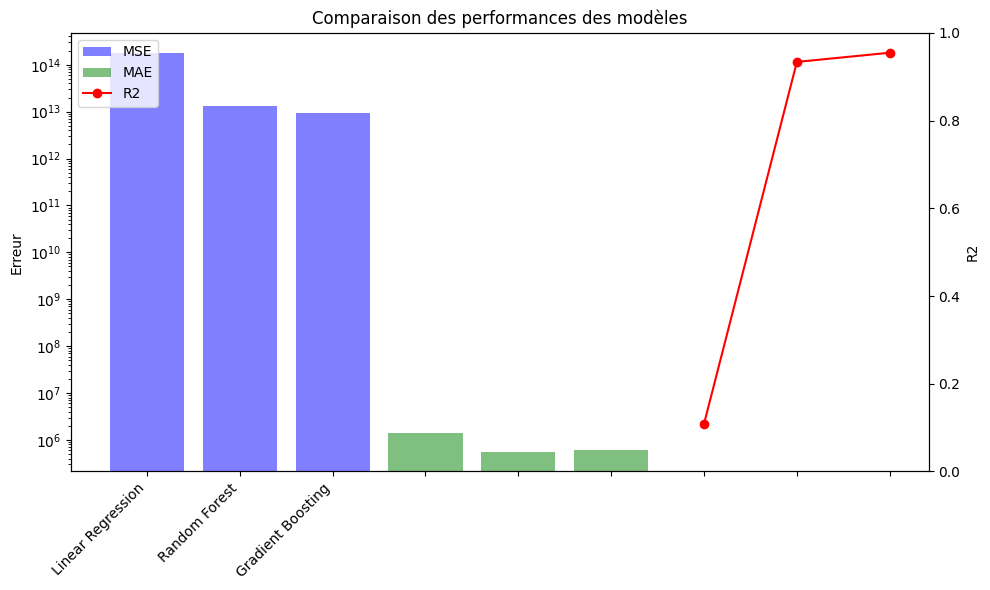

In [440]:
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mse = [1.798592e+14, 1.337999e+13, 9.152269e+12]
mae = [1.393005e+06, 5.653743e+05, 6.169403e+05]
r2 = [0.108688, 0.933694, 0.954645]

# Création du graphique
fig, ax1 = plt.subplots(figsize=(10, 6))


bars_mse = ax1.bar([model + ' (MSE)' for model in models], mse, color='b', alpha=0.5, label='MSE')
bars_mae = ax1.bar([model + ' (MAE)' for model in models], mae, color='g', alpha=0.5, label='MAE')

# Axe y pour MSE et MAE
ax1.set_ylabel('Erreur')
ax1.set_yscale('log')  

# Axe y pour R2
ax2 = ax1.twinx()
line_r2 = ax2.plot([model + ' (R2)' for model in models], r2, marker='o', color='r', label='R2')
ax2.set_ylabel('R2')
ax2.set_ylim(0, 1)

# Inclinaison des étiquettes de l'axe x
ax1.set_xticklabels([model for model in models], rotation=45, ha='right')

# Titre et légende
ax1.set_title('Comparaison des performances des modèles')
ax1.legend(handles=[bars_mse, bars_mae, line_r2[0]], labels=['MSE', 'MAE', 'R2'], loc='upper left')

plt.tight_layout()
plt.show()



On voit ici que le Gradient Boosting est le modèle d'ensemble Gradient Boosting est le plus adapté car il possède le plus petit MSE, un petit MAE et le plus grand R2.

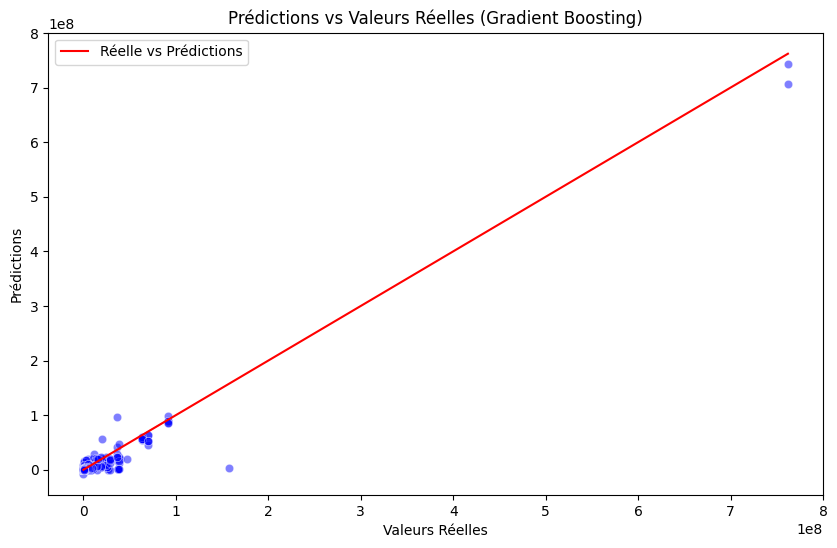

In [442]:
import matplotlib.pyplot as plt
import seaborn as sns


# Créer un graphique de dispersion avec ligne de tendance
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gradient_boosting, color='b', alpha=0.5)
sns.lineplot(x=y_test, y=y_test, color='r', label='Réelle vs Prédictions')  # Ligne y = x pour la référence
plt.title('Prédictions vs Valeurs Réelles (Gradient Boosting)')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.legend()
plt.show()


On peut voir que globalement notre modèle Gradient Boosting est le plus performant car nos tuples Prédictions - Réalités sont pour certains proche de la droite de tendance.